# Homework 7

Zachary Qian

UCLA ID: 905211936

I affirm that I personally wrote the text, code, and comments in this homework assignment.

**Note: Consulted with partner Chris on the data visualization aspect of the homework. However, most of the code discussed was already from our discussion, which (for the week in question), I wrote.**

## Problem 0

It is highly recommended that you work with your group to fully complete the Discussion assignments on 11/17, 11/19, and 11/24, as these will directly help with your project. 

## Problem 1

In your project, you are required to demonstrate the use of decision trees and multinomial logistic regression classifiers. Groups of three must also demonstrate the use of one additional model. In this homework assignment, you will write a detailed report that will largely fulfill this requirement. 

Choose one machine learning model, other than decision trees and multinomial logistic regression (unless you are a group of 2 -- see below). Some possibilities include, but are not limited to: 

- Support vector classifiers (`sklearn.svm.SVC`). Complexity parameter is called `gamma`. Higher values create more complex models)
- K-nearest-neighbor classifiers (`sklearn.neighbors.KNeighborsClassifier`). Complexity parameter is called `n_neighbors`. Higher values create less complex models. When working with KNN models, it is helpful to standardize your data columns first. For this purpose, `sklearn.preprocessing.StandardScaler` can be used. 
- Multilayer perceptron classifier, a kind of neural network (`sklearn.neural_network.MLPClassifier`). The complexity is controlled by the number of neurons and layers, as specified by the `hidden_layer_sizes` parameter -- more neurons and layers correspond to more complex models. 

You should consult the documentation for these models, which is available online or via `?`. 

**Suggestion**: It is recommended, but not required, that you coordinate with your group members so that each of you explores a different model. It is similarly suggested, but not required, that each of you use different subsets of three columns so that you can each learn something about different parts of the data. You are encouraged to help each other out on all parts of this problem. 

#### Groups of 2

If you are a group of 2, you are not required to use an additional model and may instead use multinomial logistic regression for this assignment. Please note this in your submission. 

- Multinomial logistic regression (`sklearn.linear_model.LogisticRegression`). The complexity is controlled by `C`, the inverse regularization strength. Larger values of `C` correspond to more complex models. If you demonstrate multinomial logistic regression for this problem, you should also demonstrate cross-validation to select a small feature set. That is, you should (a) skip step 2 below and (b) use CV to select a set of three features, including one qualitative feature and two quantitative ones. 

### Instructions

Replicate and expand the pipeline from Discussion 15, substituting out decision trees for your chosen classifier. You may also choose a different set of three columns than the ones used in that Discussion activity. In particular, you should: 

1. **Load** the data. 
2. **Select no more than three predictor columns** of the data and the `Species` target column, discarding the others. Choose one qualitative predictor column (e.g. `Island`, `Sex`) and two quantitative predictor columns. 
2. **Split the data** into training and test sets. 
3. Write one or more functions to **clean and transform the data** as needed. You should add comments and function docstrings as appropriate to describe to your reader what you are doing and why. Apply your functions to the training and test sets. 
4. **Use cross-validation** to estimate an optimal complexity parameter for your model. 
5. Having selected an optimal complexity parameter, **evaluate your model on the test set.** 
6. **Inspect** a few instances in which your trained model gave the wrong answer on the test set. Explain why your model was "tricked" in this case? Create and comment on a confusion matrix -- [check Monday's lecture notes](https://nbviewer.jupyter.org/github/PhilChodrow/PIC16A/blob/master/content/ML/digits.ipynb) for an example. 
7. **Plot the [decision regions](https://nbviewer.jupyter.org/github/PhilChodrow/PIC16A/blob/master/live_lectures/live-lecture-22.ipynb)** for your model. The horizontal and vertical axes should be the two quantitative predictor variables that you selected. Create a separate plot for each possible value of the qualitative predictor variable that you selected. For example, if you chose `Sex` as your qualitative variable, you should show two plots, with the decision regions for Female and Male penguins separately. Add appropriate axis labels and any other measures required to make your plots look professional. Add commentary to contextualize the mistakes that your model made. 

Throughout, add helpful explanation for your reader. For example, you should explain the idea behind cross-validation; anything you are able to learn about how your model works; how to interpret the optimal complexity parameter; and why your model went wrong in certain cases.  

### Specifications

Your solution should **not** fit in a single code cell -- a good, readable, and adequately-explained solution will likely require at least one code cell for each of the eight steps above. Make sure that there is plenty of surrounding text explanation and comments. Add code cells and plenty of markdown cells as needed. You can also use section headers with `###` to organize your work. **Treat this problem as 50% coding assignment and 50% clearly-written lab report.**

Your comments and explanation should be written to an imaginary reader who has never encountered the Palmer Penguins data set before, and knows less about machine learning than you do. Explain your steps. Why train-test split? Why cross-validation? Why decision regions? And so on. If you'd like, imagine that you are writing to a time-traveller version of you from two weeks ago. 

## Your Solution

### Load dependencies and Read Data

In [156]:
# ... 
import urllib
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
import numpy as np

In [157]:
#from our discussion activities, we load the data
url = 'https://philchodrow.github.io/PIC16A/content/IO_and_modules/IO/palmer_penguins.csv'
filedata = urllib.request.urlopen(url)
with open('penguins.csv', 'wb') as f:
    f.write(filedata.read())
penguins = pd.read_csv('penguins.csv')

### Inspect Data

In [158]:
print(penguins.shape)

penguins.head()

(344, 17)


,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


### Preprocessing and Feature Selection

We can preprocess by removing censored data, as well as data with NaN, or nonsensical values ( `Sex=` ".")

Also, we can get rid of trivial columns, such as **comments, individual ID, Sample Number,  Clutch Completion, Stage, Region and studyName**.

Notice that I also converted our categorical string columns to discrete numerics with the `LabelEncoder()` function. 

In [159]:
from sklearn import preprocessing
def clean(df):
    """
    Clean is specifically here to remove NaN values or get rid of nonsensical values in our data.
    For example, we are specifically targeting the one value in Sex that isn't Male or Female and is a "."
    
    We also use preprocessing's LabelEncoder() for the qualitative/categorical variables to convert to numeric.
    Input: dataframe
    Output: dataframe
    """
    df = df.dropna() #rid of NaN rows
    
    df = df[df.Sex != "." ]
    le = preprocessing.LabelEncoder() #change our categorical to discrete numerics
    df["Island"] = le.fit_transform(df["Island"]) #transform categorical data 
    df["Sex"] = le.fit_transform(df["Sex"]) #WLOG as seen above
    df["Species"]=le.fit_transform(df["Species"]) #WLOG as seen above
    
    return df  

In [160]:
#get rid of trivial column variables and ridding useless rows
penguins = penguins.drop(['Comments', 'Sample Number', 'Date Egg', 'Clutch Completion', 'Individual ID'
                          ,'studyName','Stage', 'Region'], axis =1) #get rid of trivial columns
penguins = clean(penguins) #clean our penguins dataframe

print(penguins.shape)

penguins.head() #quick inspection


(324, 9)


,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
1,0,2,39.5,17.4,186.0,3800.0,0,8.94956,-24.69454
2,0,2,40.3,18.0,195.0,3250.0,0,8.36821,-25.33302
4,0,2,36.7,19.3,193.0,3450.0,0,8.76651,-25.32426
5,0,2,39.3,20.6,190.0,3650.0,1,8.66496,-25.29805
6,0,2,38.9,17.8,181.0,3625.0,0,9.18718,-25.21799


In [161]:
#create our X and Y df from model backtesting and dev
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2


#Create x and y dfs (covariates and labels, respectively)
x = penguins.drop("Species",axis = 1)
y = penguins["Species"]

In [162]:
x.head()

,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
1,2,39.5,17.4,186.0,3800.0,0,8.94956,-24.69454
2,2,40.3,18.0,195.0,3250.0,0,8.36821,-25.33302
4,2,36.7,19.3,193.0,3450.0,0,8.76651,-25.32426
5,2,39.3,20.6,190.0,3650.0,1,8.66496,-25.29805
6,2,38.9,17.8,181.0,3625.0,0,9.18718,-25.21799


### Split Data

In [165]:
from sklearn.model_selection import train_test_split

np.random.seed(1000) #set seed
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25) #split 75 25 test

In [166]:
x_train.shape, y_train.shape

((243, 8), (243,))

### Systematic Feature Selection

Essentially, I found the set of all subsets of 3 variables and tested performance with our training data. Then, I outputted the scores of each combination of 3 covariates and found the best 1 qualitative and 2 quantitative covariates to choose as my model's very own covariates.

In [167]:
#Load dependencies
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import neural_network

In [168]:
#Scores for CV found in discussion
def CV_score(cols):
    """
    Seen in class. 
    Trains and evaluates a model via cross-validation on the columns of the data with selected indices
    """
    LR = LogisticRegression(max_iter=10000)
    #clf = sklearn.neural_network.MLPClassifier()
    #clf = MLPClassifier()
    return cross_val_score(LR, x_train[cols], y_train, cv = 10).mean()    
    
    
    

#### Making feature selection more automated

In [169]:
#First, we want to create all the subsets we possibly can have given a size n = 3 because we want 3 covariates
import itertools
from itertools import combinations, chain

def subsets(arr,n):
    """
    Finds total number of subsets for a given size and existing array using combinations from itertools library
    """
    return list(combinations(arr,n))
cov_subsets = subsets(x_train.columns,3)

#----------------------------------------------------------------------------------------------------------------


In [170]:
# Finding top CV Scores
scores = []
for i in range(0,len(cov_subsets)): #loop through all the combinations
    scores.append(    (cov_subsets[i]   , CV_score(list(cov_subsets[i])))    ) 
    #add to our list of scores based on different column combos
    

In [171]:
sorted(scores, key=lambda x: x[1],reverse=True)[0:6] #sort by score high to low, show top 10
#list top 10 best performing

[(('Culmen Length (mm)', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)'),
  0.9918333333333333),
 (('Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)'),
  0.9876666666666667),
 (('Culmen Length (mm)', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)'),
  0.9876666666666667),
 (('Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)'),
  0.9836666666666666),
 (('Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex'), 0.9835),
 (('Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'), 0.9755)]

As you can see, we find that the best combination of column values that have 1 categorical and 2 continuous covariates is the combination of **Sex, Culmen Length, and Culmen Depth**.

We will therefore use this for our logistic regression model.

### Training Model

#### K-Fold Cross-Validation

To prevent overfitting, I tested values from 0.01 to 1000, because increasing our C-value makes the model's complexity increase. In doing so, we become prone to being unable to generalize our model's performance.

After performing a 10-fold Cross Validation, we find that our C value that fits best is `C=1`.

[Text(0.5, 1.0, 'ML: Finding C Regularization Value: 1 with score: 0.9835')]

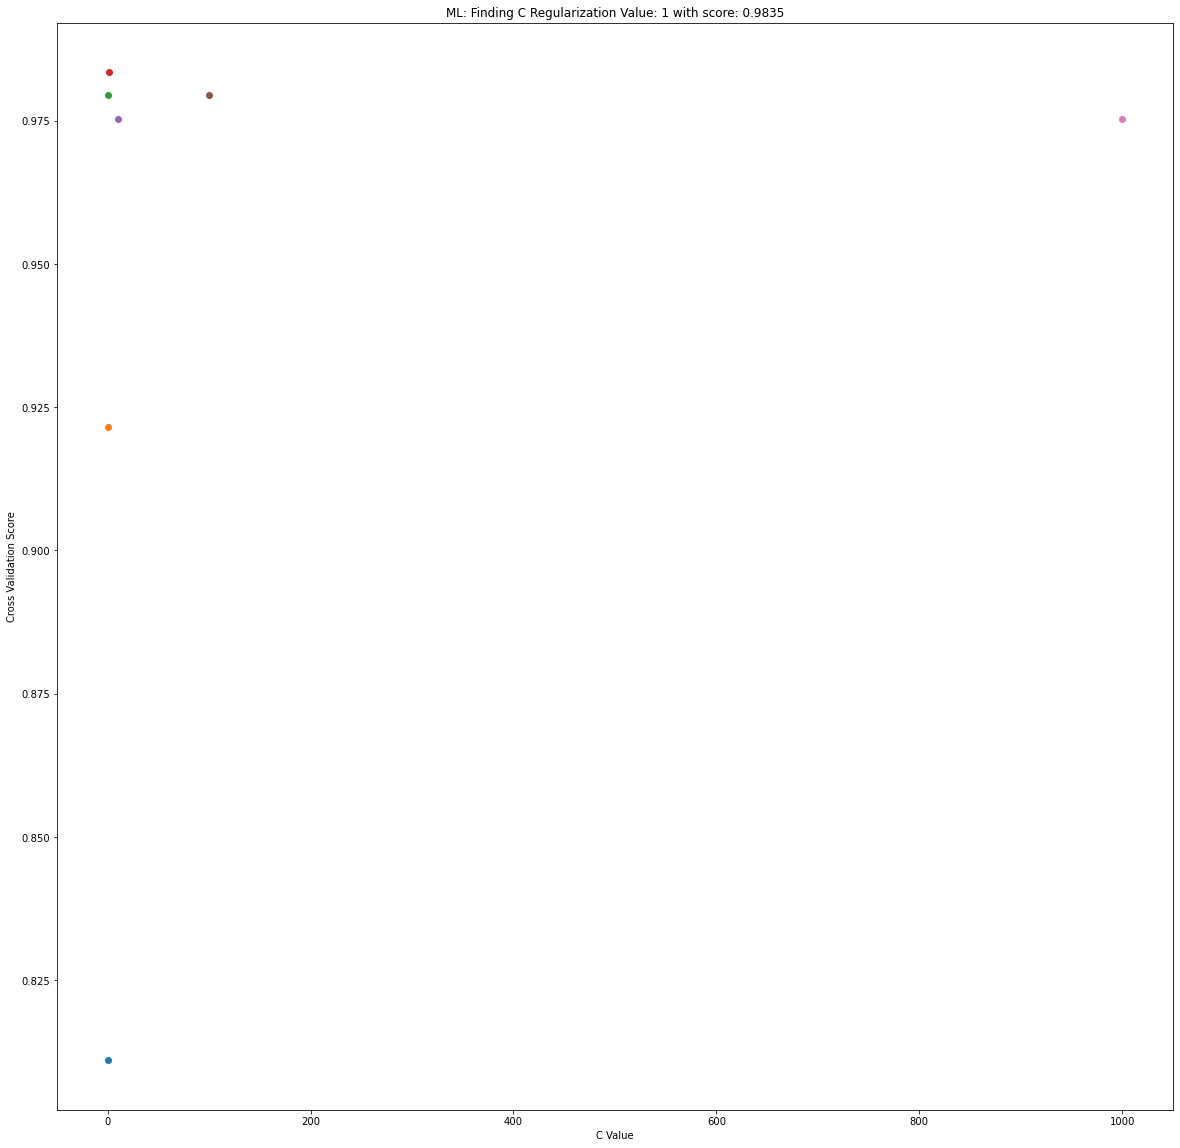

In [176]:
import string
cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex'] #selected covariates
#printing out graph and finding best params
fig, ax = plt.subplots(1, figsize = (20, 20))
best_score = -1000000 #set abritrary number
best_depth = 0
arr = [.001,.01,0.5,1,10,100,1000]
for i in arr:
#for i in range(1,100):
    lr = LogisticRegression(C=i, max_iter = 10000)
    cv_score = sklearn.model_selection.cross_val_score(lr,x_train[cols], y_train, cv = 10).mean() #set kfold CV to 10
    if best_score < cv_score:
        best_score = cv_score
        best_depth = i
    ax.scatter(i,cv_score)
    ax.set(xlabel = "C Value", ylabel = "Cross Validation Score")

ax.set( title = "ML: Finding C Regularization Value: " +  str(best_depth) + " with score: " +  str(best_score))


As you can see, we find that our best C regularization parameter is at `C = 1` for our training set. 

Therefore, we can test our model with this parameter with `max_iter = 10000`.

In [177]:
best_depth #C = 1.0 is best!

1

### Testing Model

In [178]:
ideal_LR = LogisticRegression(C=best_depth, max_iter=10000)
ideal_LR.fit(x_train[cols],y_train)

LogisticRegression(C=1, max_iter=10000)

In [179]:
LR_score = ideal_LR.score(x_test[cols],y_test)
print("Our score with the 3 best parameters and C = 1 is: ", LR_score)

Our score with the 3 best parameters and C = 1 is:  1.0


In [211]:
print(ideal_LR.score(x_train[cols],y_train)) #training score
print(LR_score) #test score


0.9876543209876543
1.0


### Evaluating our Results and Analyzing Mistakes

We can analyze our results through a confusion matrix. We also need a prediction object as well.

We see that we have a total of 0 missed/incorrect labels. Not bad!

In [2]:
from sklearn.metrics import confusion_matrix

y_predict = ideal_LR.predict(x_test[cols]) #define our prediction label array as y_predict
confusionMatrix = confusion_matrix(y_test, y_predict) #initialize our confusion matrix

confusionMatrix

NameError: name 'ideal_LR' is not defined

In [187]:
mistakes = (x_test[cols])[y_test != y_predict] #find mistakes
mistaken_labels = y_test[y_test != y_predict] #find wrong labels
mistaken_preds = y_predict[y_test != y_predict]

print(mistaken_labels) #the actual labels
print(mistaken_preds) #what we predicted

mistakes.head()

Series([], Name: Species, dtype: int64)
[]


,Culmen Length (mm),Culmen Depth (mm),Sex


**REMARK: Perfect model? I think so! (Note that I could also increase my training set data as well as do imputed data for better generalization. However, I'll stick to this due to the late hour that it currently is (spent approx 2 hours doing the `plot_region()`function).**

## Model Visualization and Statistics

First, I wanted to provide a "table 1"-esque summary of the statistics we have, stratified first by sex and then by the species of penguin for the two categorical variables. Then, I print out the number of male and female penguins through `value_counts()` function as well (163 men, 161 female).

After this, I used the live-lecture's `plot_region()` function and my discussion from last week to help me define a function that works alongside `group_by.apply()` to have 2 decision region plots from our training data.

In [202]:
#First, create summary table: function used in one of discussion section

def summary_stats(group_cols, value_cols):
    """
    Returns mean, std, and variance by a grouping
    group_cols = by what group
    value_cols = what we are aggregating and grouping
    """
    return penguins.groupby(group_cols)[value_cols].aggregate([np.mean,np.std,np.var])
display(summary_stats(["Sex","Species"], ["Culmen Length (mm)","Culmen Depth (mm)"]))

Culmen Length (mm)                     Culmen Depth (mm)  \
                          mean       std       var              mean   
Sex Species                                                            
0   0                37.212676  2.003706  4.014837         17.619718   
    1                46.573529  3.108669  9.663824         17.588235   
    2                45.563793  2.051247  4.207613         14.237931   
1   0                40.427941  2.341568  5.482939         19.057353   
    1                51.069697  1.582222  2.503428         19.245455   
    2                49.510000  2.728674  7.445661         15.725000   

                                 
                  std       var  
Sex Species                      
0   0        0.956126  0.914177  
    1        0.781128  0.610160  
    2        0.540249  0.291869  
1   0        1.019265  1.038900  
    1        0.771804  0.595682  
    2        0.745296  0.555466

In [224]:
penguins.Sex.value_counts()

0    163
1    161
Name: Sex, dtype: int64

In [203]:
#Create dictionaries for the two categorical columns we need: our actual labels and a categorical variable
#that turned into a binary numeric
Sex    =  {
    0: "MALE",
    1: "FEMALE"
}

Species = {
    0: "Adelie",
    1: "Chinstrap",
    2: "Gentoo"
}

In [204]:
cols

['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex']

#### Define our plot function

In [222]:
def plot_regions(df):
    """
    Plots the decision regions from a classifer 
    underneath the data in X and y. 
    c: logreg classifier
    X: predictor variables
    y: target variables
    """
    c = LogisticRegression(C=best_depth, max_iter=10000)
    # fit the model to the data
    c.fit(x_train[cols], y_train)
    
    # for convenience, give names to the three 
    # columns of the data
    x0 = x_train[cols]['Culmen Length (mm)']
    x1 = x_train[cols]['Culmen Depth (mm)']
    
    #We want to group by Sex due to the Categorical variable being binary
    


    # for every x, y coordinate(xo, x1) to fill 3 planes.
    # there are 251001 combinations of (xo,x1) coordinates.
    #choosing these dimensions were discussed by me and my partner, Chris. We just arbitrarily choose 501
    
    grid = df["Sex"].max()*np.ones(251001) #set our grid based on Sex covariate
    
    grid_x = np.linspace(x0.min(), x0.max(), 501) #define our other grid_x predicated on our Culmen length
    grid_y = np.linspace(x1.min(), x1.max(), 501) #define our grid_y as Culmen depth's values
    
    xx, yy = np.meshgrid(grid_x, grid_y) #define meshgrid like the one in live discussion
    
    # extract model predictions, using the 
    # np.c_ attribute to join together the 
    # three parts of the grid. 
    # array.ravel() converts an multidimensional
    # array into a 1d array, and we use array.reshape()
    # to turn the resulting predictions p 
    # back into 2d
    
    p = c.predict(np.c_[xx.ravel(), yy.ravel(),grid])
    p = p.reshape(xx.shape)
    
    # create the plot
    # Each z layer(Sex) is plotted on a separate subplot
    # create color dictionary for our 3 species, and designating them to a unique color
    color = {
        0 : "steelblue",
        1 : "orangered",
        2 : "seagreen"
         }

    
    # used contour plot to visualize the predictions
    ax[df["Sex"].max()].contourf(xx, yy, p,alpha = .07)
    
    
    # use scatter plot to plot the provided the data
    ax[df["Sex"].max()].scatter(df["Culmen Length (mm)"],df["Culmen Depth (mm)"],
                                        color = color[df["Species"].max()], label = Species[df["Species"].max()]) 
    ax[df["Sex"].max()].set(title = Sex[df["Sex"].max()],xlabel = "Culmen Length (mm)",
                                     ylabel = "Culmen Depth (mm)")
    
    ax[df["Sex"].max()].legend() # add legend
    

""


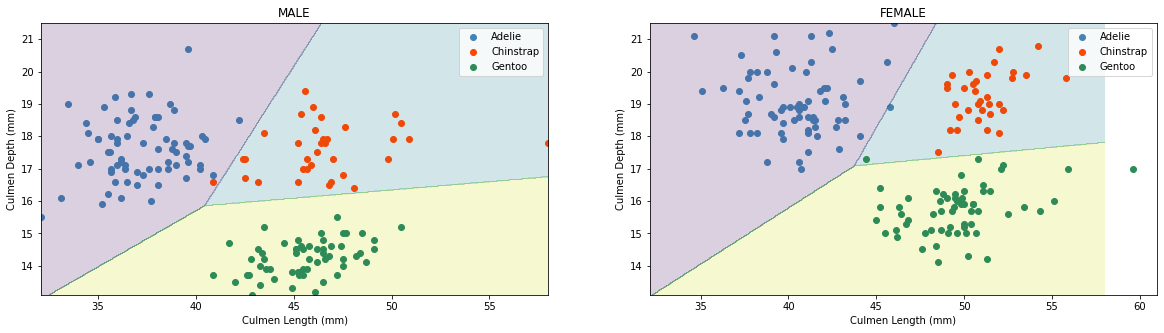

In [223]:
fig,ax =plt.subplots(1,2,figsize =(20,5)) #define fig

penguins.groupby(["Sex","Species"]).apply(plot_regions) #use group_by() to split by sex, apply instead of looping

Notice that in our training data, we have missed one Chinstrap and classified it as an Adelie for Males, and then Females we classified 3 incorrectly as well. These mistakes have occurred due to the clustering that we did based on our culmen depth and culmen length. The coordinate was classified incorrectly because it fell onto the region of a different penguin. 

**NOTE: However, in my test data set, I had a 100% accuracy, and I discovered 0 misclassifications!**